## Step 4
### Target
- Improve accuracy to meet target.
- Use Squeeze-Expand model.
- LROnPlateau & Data Augmentation

### Results
- Parameters: 7356
- Best Train Accuracy 99.31%  
- Best Test Accuracy 99.46%  

### Analysis
1. Final Model

In [7]:
from utils import *

## Data Transformations


In [8]:
# Data transformation parameters
centerCrop = 22
resize = 28
randomRotate = 7.
mean = 0.1307
std_dev = 0.3081

# Train Phase transformations
train_transforms = getTrainTransforms_CropRotate(centerCrop, resize, randomRotate, mean,std_dev)

# Test Phase transformations
test_transforms = getTestTransforms(mean,std_dev)

In [11]:
train_data = datasets.MNIST('./data', train=True, download = True, transform=train_transforms)
test_data = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Dataloader Arguments & Test/Train Dataloaders

In [12]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## Model

In [17]:
from model import *
Net = Model_4

## Model Params

In [18]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             136
      BatchNorm2d-11            [-1, 8, 12, 12]              16
           Conv2d-12           [-1, 16, 10, 10]           1,152

/content/model.py:322: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Training and Testing

In [21]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=3, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(model, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(model, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step(tst_acc[0])

Epoch 1


  0%|          | 0/235 [00:00<?, ?it/s]/content/model.py:322: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=0.1671 Batch_id=234 Accuracy=95.49: 100%|██████████| 235/235 [00:22<00:00, 10.56it/s]


Test set: Average loss: 0.0466, Accuracy: 9880/10000 (98.80%)

Epoch 2


Train: Loss=0.0524 Batch_id=234 Accuracy=98.20: 100%|██████████| 235/235 [00:22<00:00, 10.39it/s]


Test set: Average loss: 0.0337, Accuracy: 9891/10000 (98.91%)

Epoch 3


Train: Loss=0.0574 Batch_id=234 Accuracy=98.39: 100%|██████████| 235/235 [00:23<00:00,  9.86it/s]


Test set: Average loss: 0.0360, Accuracy: 9893/10000 (98.93%)

Epoch 4


Train: Loss=0.0327 Batch_id=234 Accuracy=98.53: 100%|██████████| 235/235 [00:23<00:00, 10.20it/s]


Test set: Average loss: 0.0283, Accuracy: 9909/10000 (99.09%)

Epoch 5


Train: Loss=0.0116 Batch_id=234 Accuracy=98.73: 100%|██████████| 235/235 [00:22<00:00, 10.23it/s]


Test set: Average loss: 0.0325, Accuracy: 9906/10000 (99.06%)

Epoch 00005: reducing learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0821 Batch_id=234 Accuracy=98.99: 100%|██████████| 235/235 [00:23<00:00, 10.17it/s]


Test set: Average loss: 0.0236, Accuracy: 9926/10000 (99.26%)

Epoch 7


Train: Loss=0.0271 Batch_id=234 Accuracy=99.04: 100%|██████████| 235/235 [00:22<00:00, 10.27it/s]


Test set: Average loss: 0.0214, Accuracy: 9927/10000 (99.27%)

Epoch 8


Train: Loss=0.0074 Batch_id=234 Accuracy=99.11: 100%|██████████| 235/235 [00:22<00:00, 10.34it/s]


Test set: Average loss: 0.0213, Accuracy: 9939/10000 (99.39%)

Epoch 9


Train: Loss=0.0246 Batch_id=234 Accuracy=99.09: 100%|██████████| 235/235 [00:22<00:00, 10.23it/s]


Test set: Average loss: 0.0216, Accuracy: 9935/10000 (99.35%)

Epoch 00009: reducing learning rate of group 0 to 2.5000e-02.
Epoch 10


Train: Loss=0.0166 Batch_id=234 Accuracy=99.19: 100%|██████████| 235/235 [00:23<00:00,  9.82it/s]


Test set: Average loss: 0.0210, Accuracy: 9929/10000 (99.29%)

Epoch 11


Train: Loss=0.0028 Batch_id=234 Accuracy=99.25: 100%|██████████| 235/235 [00:22<00:00, 10.25it/s]


Test set: Average loss: 0.0221, Accuracy: 9923/10000 (99.23%)

Epoch 12


Train: Loss=0.0159 Batch_id=234 Accuracy=99.27: 100%|██████████| 235/235 [00:22<00:00, 10.40it/s]


Test set: Average loss: 0.0214, Accuracy: 9942/10000 (99.42%)

Epoch 13


Train: Loss=0.0103 Batch_id=234 Accuracy=99.26: 100%|██████████| 235/235 [00:22<00:00, 10.28it/s]


Test set: Average loss: 0.0217, Accuracy: 9938/10000 (99.38%)

Epoch 00013: reducing learning rate of group 0 to 1.2500e-02.
Epoch 14


Train: Loss=0.0330 Batch_id=234 Accuracy=99.28: 100%|██████████| 235/235 [00:23<00:00, 10.12it/s]


Test set: Average loss: 0.0204, Accuracy: 9938/10000 (99.38%)

Epoch 15


Train: Loss=0.0479 Batch_id=234 Accuracy=99.32: 100%|██████████| 235/235 [00:24<00:00,  9.79it/s]


Test set: Average loss: 0.0200, Accuracy: 9940/10000 (99.40%)

Epoch 16


Train: Loss=0.0160 Batch_id=234 Accuracy=99.32: 100%|██████████| 235/235 [00:25<00:00,  9.33it/s]


Test set: Average loss: 0.0198, Accuracy: 9940/10000 (99.40%)

Epoch 17


Train: Loss=0.0217 Batch_id=234 Accuracy=99.33: 100%|██████████| 235/235 [00:24<00:00,  9.77it/s]


Test set: Average loss: 0.0196, Accuracy: 9936/10000 (99.36%)

Epoch 00017: reducing learning rate of group 0 to 6.2500e-03.
Epoch 18


Train: Loss=0.0443 Batch_id=234 Accuracy=99.34: 100%|██████████| 235/235 [00:23<00:00, 10.16it/s]


Test set: Average loss: 0.0195, Accuracy: 9935/10000 (99.35%)

Epoch 19


Train: Loss=0.0148 Batch_id=234 Accuracy=99.38: 100%|██████████| 235/235 [00:23<00:00, 10.04it/s]


Test set: Average loss: 0.0187, Accuracy: 9941/10000 (99.41%)

Epoch 20


Train: Loss=0.0054 Batch_id=234 Accuracy=99.34: 100%|██████████| 235/235 [00:24<00:00,  9.66it/s]


Test set: Average loss: 0.0193, Accuracy: 9939/10000 (99.39%)



Text(0.5, 1.0, 'Test Accuracy')

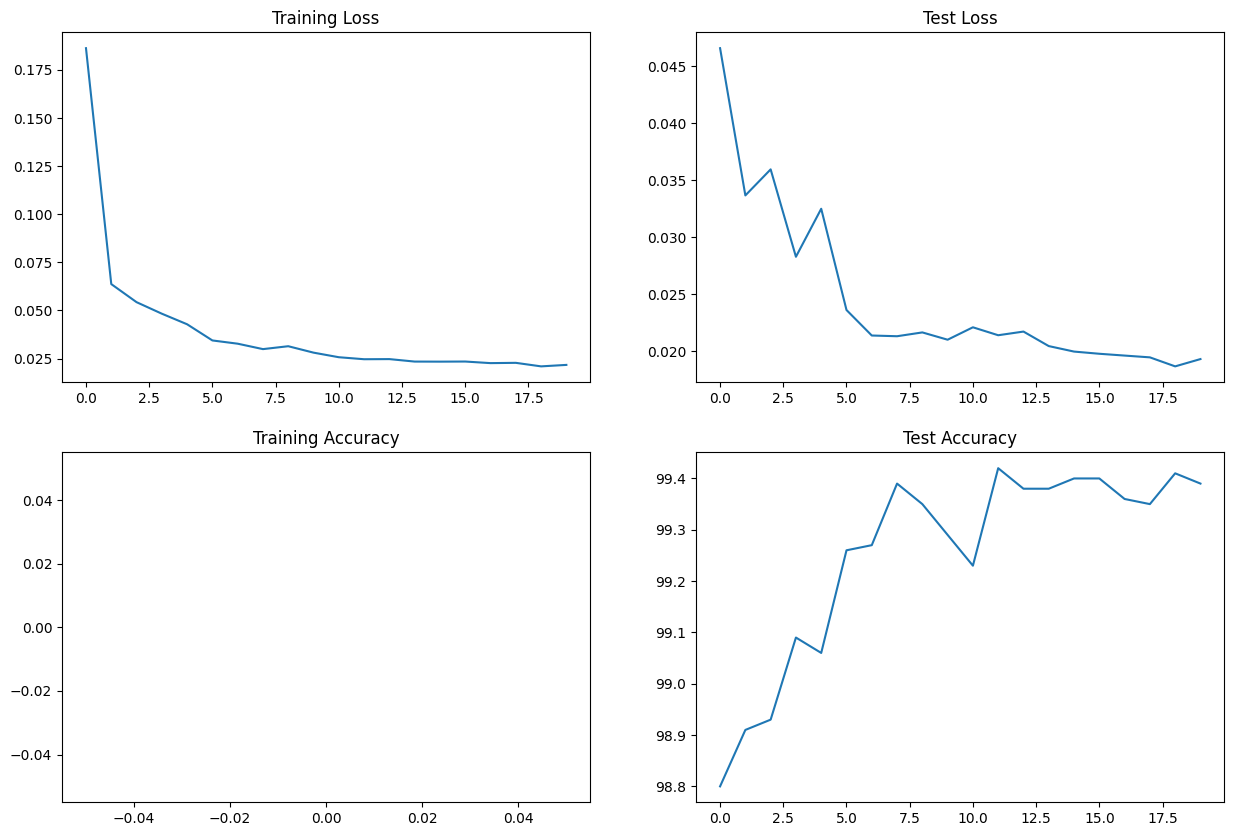

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")